   article_id label        entity_text entity_label  count
0           0  true         WASHINGTON          GPE      1
1           0  true            Reuters          ORG      1
2           0  true  the U.S. Congress          ORG      1
3           0  true               U.S.          GPE      3
4           0  true       Mark Meadows       PERSON      1


/var/folders/0m/t7cx068x76z0rhbrsgqf8fbr0000gn/T/ipykernel_46329/2957444889.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], y=top_true.index, x=top_true.values, palette='Greens_r')
/var/folders/0m/t7cx068x76z0rhbrsgqf8fbr0000gn/T/ipykernel_46329/2957444889.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], y=top_fake.index, x=top_fake.values, palette='Reds_r')


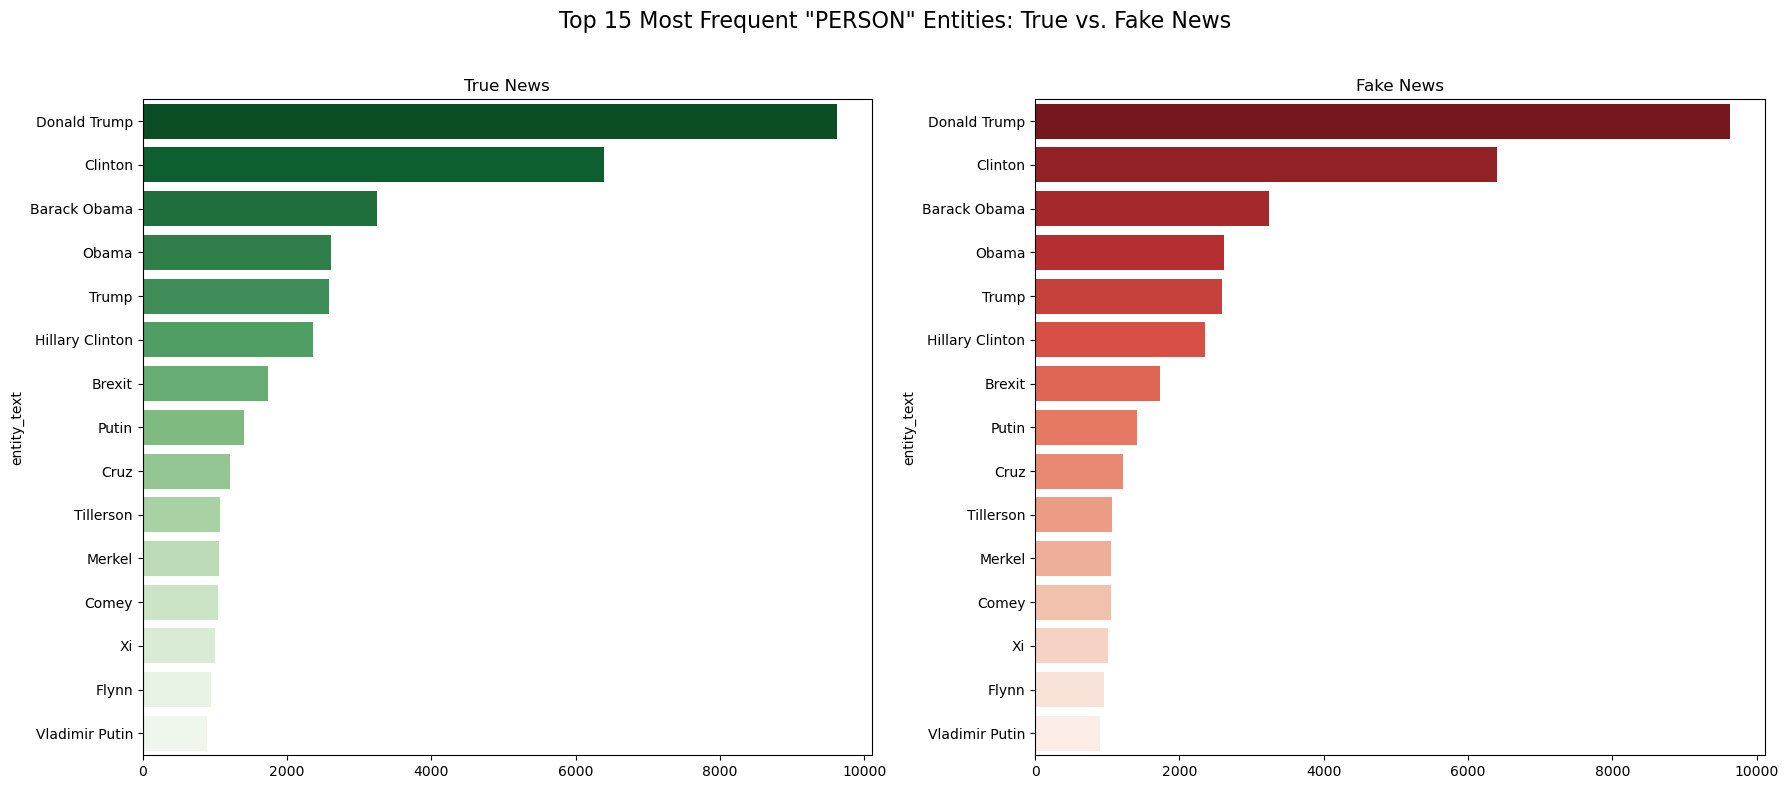

In [1]:
# 2_Named_Entity_Recognition_Enhanced.ipynb

import pandas as pd
import spacy
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

nlp = spacy.load("en_core_web_sm")

true_df = pd.read_csv('/Users/maryamayman/fake_news_project/data/raw/True.csv')
fake_df = pd.read_csv('/Users/maryamayman/fake_news_project/data/raw/True.csv')
true_df['label'] = 'true'
fake_df['label'] = 'fake'
data = pd.concat([true_df, fake_df], ignore_index=True)
data['article_id'] = data.index

def extract_entities(text):
    doc = nlp(text)
    entities = []
    allowed_labels = ['PERSON', 'ORG', 'GPE', 'LOC']
    for ent in doc.ents:
        if ent.label_ in allowed_labels:
            entities.append((ent.text.strip(), ent.label_))
    return entities

data['entities'] = data['text'].apply(extract_entities)

entities_list = []
for index, row in data.iterrows():
    article_id = row['article_id']
    label = row['label']
    entities = row['entities']
    entity_counts = Counter(entities)
    for (entity_text, entity_label), count in entity_counts.items():
        if entity_text:
            entities_list.append([article_id, label, entity_text, entity_label, count])

entities_df = pd.DataFrame(entities_list, columns=['article_id', 'label', 'entity_text', 'entity_label', 'count'])
print(entities_df.head())

def plot_entity_comparison(entity_label, n=15):
    top_true = entities_df[(entities_df['label'] == 'true') & (entities_df['entity_label'] == entity_label)].groupby('entity_text')['count'].sum().nlargest(n)
    top_fake = entities_df[(entities_df['label'] == 'fake') & (entities_df['entity_label'] == entity_label)].groupby('entity_text')['count'].sum().nlargest(n)
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))
    fig.suptitle(f'Top {n} Most Frequent "{entity_label}" Entities: True vs. Fake News', fontsize=16)
    sns.barplot(ax=axes[0], y=top_true.index, x=top_true.values, palette='Greens_r')
    axes[0].set_title('True News')
    sns.barplot(ax=axes[1], y=top_fake.index, x=top_fake.values, palette='Reds_r')
    axes[1].set_title('Fake News')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

plot_entity_comparison('PERSON')

In [2]:
data.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date label  article_id  \
0  December 31, 2017   true           0   
1  December 29, 2017   true           1   
2  December 31, 2017   true           2   
3  December 30, 2017   true           3   
4  December 29, 2017   true           4   

                                            entities  
0  [(WASHINGTON, GPE), (Reuters, ORG), (the U.S. ...  
1  [(WASHINGTON, GPE), (Reuters, ORG), (U.S., GPE...  
2  [(WASHINGTON, GPE), (Reuters, ORG), (Russia, G...  
3  [(WASHINGTON, GPE), (Reuters, ORG), (George Pa...  
4  [(SEATTLE, GPE), (Reuters, ORG), (Donald Trump...

PERSON: People

This includes the names of real individuals, fictional characters, or even job titles used as names.

Examples: Donald Trump, Mark Meadows, Hillary Clinton

GPE: Geopolitical Entity

This is the most common label for places. It refers to countries, cities, states, provinces, etc.

Examples: WASHINGTON, U.S., Russia, North Korea

ORG: Organization

This includes companies, government agencies, institutions, political parties, sports teams, etc.

Examples: Reuters, the U.S. Congress, FBI, Republicans

LOC: Location

This is for non-GPE locations, like mountain ranges, bodies of water, or geographical regions that are not political entities. You'll see this less often in news articles compared to GPE.

Examples: the Pacific Ocean, the Middle East, the Alps

In [3]:
import pandas as pd

# This assumes your 'entities_df' DataFrame is already created.

print("--- Aggregated Report of All Named Entities ---")
print("This report shows the total count of each entity across all articles.\n")

# Group by entity text and label, then sum the counts
aggregated_entities = entities_df.groupby(['entity_text', 'entity_label'])['count'].sum().reset_index()

# Sort the results by count in descending order to see the most frequent entities first
aggregated_entities_sorted = aggregated_entities.sort_values(by='count', ascending=False)

# Set pandas display options to show all rows (if needed)
pd.set_option('display.max_rows', None)

# Print the final report
print(aggregated_entities_sorted)

# Reset display options to default if you want
pd.reset_option('display.max_rows')

--- Aggregated Report of All Named Entities ---
This report shows the total count of each entity across all articles.

                                             entity_text entity_label  count
50400                                              Trump          ORG  76010
50869                                               U.S.          GPE  62978
40730                                            Reuters          ORG  57082
62165                                  the United States          GPE  21012
13399                                       Donald Trump       PERSON  19252
9507                                               China          GPE  15934
42114                                             Russia          GPE  15846
52569                                         WASHINGTON          GPE  13706
43879                                             Senate          ORG  13632
10312                                            Clinton       PERSON  12790
21808                             

In [4]:
import pandas as pd

# This assumes your 'entities_df' DataFrame is already created.

print("--- Entity Distribution in True vs. Fake News ---")
print("This table shows the total number of times each entity appeared in true and fake articles.\n")

# Use pivot_table to create a summary table
# We will sum the 'count' for each entity, separated by the 'label' (true/fake)
entity_distribution = entities_df.pivot_table(
    index='entity_text', 
    columns='label', 
    values='count', 
    aggfunc='sum', 
    fill_value=0
)

# Add a 'total' column to see the most frequent entities overall
entity_distribution['total'] = entity_distribution['true'] + entity_distribution['fake']

# Sort by the 'total' column to see the most prominent entities first
entity_distribution_sorted = entity_distribution.sort_values(by='total', ascending=False)


# Set pandas display options to show more rows if you want to see the full list
pd.set_option('display.max_rows', 200)

# Print the final report
print(entity_distribution_sorted.head(50)) # Displaying the top 50 entities

# Reset display options to default
pd.reset_option('display.max_rows')

--- Entity Distribution in True vs. Fake News ---
This table shows the total number of times each entity appeared in true and fake articles.

label                fake   true  total
entity_text                            
Trump               40635  40635  81270
U.S.                31489  31489  62978
Reuters             28542  28542  57084
the United States   10508  10508  21016
Donald Trump         9628   9628  19256
China                7967   7967  15934
Russia               7923   7923  15846
WASHINGTON           6853   6853  13706
Senate               6816   6816  13632
Clinton              6427   6427  12854
Iran                 5705   5705  11410
Obama                5662   5662  11324
Congress             5390   5390  10780
Washington           5373   5373  10746
North Korea          5290   5290  10580
EU                   4905   4905   9810
Syria                4011   4011   8022
House                3563   3563   7126
Britain              3503   3503   7006
Barack Obama      

In [6]:
import pandas as pd

# This assumes your 'entities_df' DataFrame is already created.

print("--- Entity Distribution by Category (True vs. Fake News) ---")
print("This table shows entity counts, grouped by their category (PERSON, GPE, etc.).\n")

# Use pivot_table with a multi-level index to group by both label and text
entity_distribution_by_type = entities_df.pivot_table(
    index=['entity_label'], # Group by type 
    columns='label', 
    values='count', 
    aggfunc='sum', 
    fill_value=0
)

# Add a 'total' column
entity_distribution_by_type['total'] = entity_distribution_by_type['true'] + entity_distribution_by_type['fake']

# Sort by the 'total' column to see the most prominent entities first
entity_distribution_sorted = entity_distribution_by_type.sort_values(by='total', ascending=False)


# Set pandas display options to show more rows
pd.set_option('display.max_rows', 200)

# Print the final report, showing the top 100 entities
print(entity_distribution_sorted.head(100))

# Reset display options
pd.reset_option('display.max_rows')

--- Entity Distribution by Category (True vs. Fake News) ---
This table shows entity counts, grouped by their category (PERSON, GPE, etc.).

label           fake    true   total
entity_label                        
ORG           249355  249355  498710
GPE           231574  231574  463148
PERSON        174155  174155  348310
LOC            13310   13310   26620


In [7]:
import pandas as pd

# This assumes your 'entities_df' DataFrame is already created.

print("--- Corrected Entity Distribution by Category (True vs. Fake News) ---")
print("This table shows the corrected count of entities for each category.\n")

# A more robust way to count: Group by both label and type, sum the counts, then pivot.
correct_counts = entities_df.groupby(['entity_label', 'label'])['count'].sum().unstack(fill_value=0)

# Add a 'total' column to see the most frequent categories
correct_counts['total'] = correct_counts['true'] + correct_counts['fake']

# Sort by the 'total' column to see the most prominent categories first
correct_counts_sorted = correct_counts.sort_values(by='total', ascending=False)

# Print the final, correct report
print(correct_counts_sorted)

--- Corrected Entity Distribution by Category (True vs. Fake News) ---
This table shows the corrected count of entities for each category.

label           fake    true   total
entity_label                        
ORG           249355  249355  498710
GPE           231574  231574  463148
PERSON        174155  174155  348310
LOC            13310   13310   26620
